
# COVID-19'S PICTURE IN VIETNAM 
### _Author: Tran Ngoc Bao Son_

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Disclaimer](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Conclusion](#conclusion)



# 1. Introduction:<a name="introduction"></a>

When the 2019's calendar was gradually closing, Chinese officials informed the first case of COVID-19 in Wuhan. Until now, many countries are dramatically suffered from pandemic aftermaths (US, Sweeden, Latin America, Europe ,etc. ), including Vietnam, reported their first COVID-19 cases since the Jan 2020.

While the number of confirmed cases and deaths has exponentially risen in other countries, Vietnam currently only has under 400 COVID-19 cases in and NO FATALITIES.

In fact, one remarkable point in Vietnam is privacy laws that are not as stringent as in the US, Japan or the EU. Therefore, COVID-19 patient data in Vietnam is almost publicly available. (To be more transparent and effective in COVID-19 contact tracing task, Vietnam COVID-19 patient data is publicly available on the Vietnam Ministry of Health's website https://moh.gov.vn/web/ministry-of-health and on other news.)

The tradeoff in personal privacy, in this circumtance, provides the data science community the opportunity to look into more details about the COVID-19 pandemic in many aspects, and at the country level. So the goals is explore the unique features of COVID-19 data in Vietnam

# 2. Data <a name="data"></a>

Data was acquired by web scrapping with manually curated from the Vietnam Ministry of Health's website (https://ncov.moh.gov.vn/) and other mainstream media in Vietnam (cited specifically in each data row).

To give better visualization for readers, correct cordinates (longtitude -lattitude) is partially used via Fourspace's API or Google to support this report's dataframes

# 3. Disclaimer <a name="data"></a>

* THIS IS A TEST AND NO LINK TO ANY GROUP OR OGRANIZATION. Although this analysis is data-driven and hence provides some insights about the government strategy as well as patient characteristics in Vietnam, my comments reflect my personal perspectives.


* My results are based on the data collected from the Vietnam Health Ministry website and other mainstream media in Vietnam. Therefore, the data is likely to be biased and reflects what is publicly available on the internet. However, it can served as a good reference for someone who are curious about the COVID-19 pandemic in Vietnam.

# 4. Methodology 
EXPLORATORY DATA ANALYSIS - (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task

LIST OF TRANSFORMED DATAFRAMES:

* 'patient_data': all detail about patients

* 'hospitalized_time': number of hospitalized days for each patient

* 'df_travel_country': list of country patients did travel and got infected, 2 data frames for the first and second wave of infection (secondwave was started with patient BN17) (df_travel_country_firstwave and df_travel_country_secondwave)

* 'df_cases': all statistics about cases

* 'vietnam_cases_all_times': Number of cases (confirmed cases, new cases, death) in each province/region - same format as the world data format from Johns Hopkins University - CSSEG

# 5. Analysis

In [1]:
!pip install requests
!pip install lxml
!pip install geopy

import numpy as np
import pandas as pd 
import os

# Import other neccessary package
from datetime import date
import datetime as dt
import collections
import random
import statistics
import requests
# matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import matplotlib.style as style
import matplotlib.gridspec as gridspec
import matplotlib as mpl # use/reset style
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

# seaborn
import seaborn as sns
sns.set_style("whitegrid")

## Map visualization
import folium
import altair as alt

# Plotly
from plotly import tools, subplots
from plotly.subplots import make_subplots
import plotly.offline as py
py.init_notebook_mode(connected=True) # Required to use plotly offline in jupyter notebook
import plotly.graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
import plotly.io as pio
pio.templates.default = "plotly_white"

'''Display markdown formatted output like bold, italic bold etc.'''
from IPython.display import Markdown
def bold(string):
    display(Markdown(string))

In [14]:
vietnam_patient_data = pd.read_csv(r"C:\Users\baoso\Dropbox\Coursera\Vietnam Covid dataset\datasets_595864_1145190_Vietnam_COVID-19_patient_data_May10_2020.csv")
vietnam_patient_data.tail()

,ID,Gender,Age,Nationality,Detection Location,Treatment Location,Hospital,Confirmed Date,Travel History,Travel Country,...,Discharged Date,Re-Infected,Re-discharged,Reference 1,Reference 2,Reference 3,Reference 4,Reference 5,Note,Number of negative test before discharged
283,BN284,F,30.0,Vietnam,Can Tho,Can Tho,Bệnh viện Đa khoa Bạc Liêu,5/7/20,1,United Arab Emirates,...,NaN,NaN,NaN,https://vnexpress.net/them-17-ca-duong-tinh-nc...,NaN,NaN,NaN,NaN,NaN,NaN
284,BN285,F,30.0,Vietnam,Can Tho,Can Tho,Bệnh viện Đa khoa Bạc Liêu,5/7/20,1,United Arab Emirates,...,NaN,NaN,NaN,https://vnexpress.net/them-17-ca-duong-tinh-nc...,NaN,NaN,NaN,NaN,NaN,NaN
285,BN286,F,23.0,Vietnam,Can Tho,Can Tho,Bệnh viện Đa khoa Bạc Liêu,5/7/20,1,United Arab Emirates,...,NaN,NaN,NaN,https://vnexpress.net/them-17-ca-duong-tinh-nc...,NaN,NaN,NaN,NaN,NaN,NaN
286,BN287,M,28.0,Vietnam,Can Tho,Can Tho,Bệnh viện Đa khoa Bạc Liêu,5/7/20,1,United Arab Emirates,...,NaN,NaN,NaN,https://vnexpress.net/them-17-ca-duong-tinh-nc...,NaN,NaN,NaN,NaN,NaN,NaN
287,BN288,F,32.0,Vietnam,Can Tho,Can Tho,Bệnh viện Đa khoa Bạc Liêu,5/7/20,1,United Arab Emirates,...,NaN,NaN,NaN,https://vnexpress.net/them-17-ca-duong-tinh-nc...,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
vietnam_hospitalized_patient_info = pd.read_csv(r"C:\Users\baoso\Dropbox\Coursera\Vietnam Covid dataset\datasets_595864_1145190_Vietnam_COVID-19_HospitalizedPatient_May10_2020.csv")
vietnam_hospitalized_patient_info.tail()

,Date,No of Hospitalized Patients
105,5/6/20,39
106,5/7/20,55
107,5/8/20,55
108,5/9/20,55
109,5/10/20,55


In [16]:
vietnam_region_info = pd.read_csv(r"C:\Users\baoso\Dropbox\Coursera\Vietnam Covid dataset\datasets_595864_1145190_Vietnam_province_info.csv")
vietnam_region_info.tail()

,Province/State,Region code,Country/Region,Lat,Long
58,Tra Vinh,VN-51,Vietnam,9.934,106.334
59,Tuyen Quang,VN-07,Vietnam,21.818,105.211
60,Vinh Long,VN-49,Vietnam,10.256,105.964
61,Vinh Phuc,VN-70,Vietnam,21.361,105.547
62,Yen Bai,VN-06,Vietnam,21.705,104.875


In [17]:
vietnam_patient_data = vietnam_patient_data.rename({'Confirmed Date': 'Date'}, axis = 'columns')
vietnam_patient_data['Date'] = pd.to_datetime(vietnam_patient_data['Date'])
vietnam_patient_data.shape

(288, 30)

In [18]:
vietnam_patient_data.describe(include=['O'])

,ID,Gender,Nationality,Detection Location,Treatment Location,Hospital,Travel Country,"Travel Country, Correct",Source of Infection,Relationship,...,Discharged Date,Re-Infected,Re-discharged,Reference 1,Reference 2,Reference 3,Reference 4,Reference 5,Note,Number of negative test before discharged
count,288,288,288,288,288,288,184,175,80,102,...,221,16,2,276,151,19,3,1,8,3
unique,288,2,14,30,25,49,56,46,56,57,...,38,10,1,82,45,18,3,1,7,3
top,BN54,F,Vietnam,Hanoi,Hanoi,Bệnh viện Bệnh nhiệt đới Trung Ương (cơ sở 2),United Kingdom,United Kingdom,F1(BN34),Truong Sinh Company - supply company for Bach ...,...,3/30/20,4/26/20,5/5/20,https://vnexpress.net/them-17-ca-duong-tinh-nc...,https://vnexpress.net/27-nguoi-khoi-covid-19-h...,https://vnexpress.net/them-hai-benh-nhan-tp-hc...,https://vnexpress.net/so-ca-nhiem-ncov-len-266...,https://vnexpress.net/cu-ba-88-tuoi-khoi-covid...,Tracing contact,9 times negative/positive
freq,1,158,237,112,135,106,50,51,7,26,...,28,3,2,17,22,2,1,1,2,1


In [19]:
### BASIC DATA FRAME FOR PATIENT DATA:
# Name 'patient_data'

target_list = ['ID', 'Gender', 'Age', 'Nationality', 'Detection Location', 'Date',
               'Travel History','Travel Country, Correct', 'Source of Infection', 
               'Relationship', 'Health Condition When Confirmed', 
               'Detail Symptoms When Confirmed (clean up)','Underlying Health Condition','Discharged Date', 'Re-Infected']
patient_data = vietnam_patient_data[target_list]

## brief look at the data
# sns.pairplot(patient_data)

## Convert date from string to datetime type
patient_data['Date'] = pd.to_datetime(patient_data['Date'])

patient_data['Discharged Date'].unique()
# => Remove the one that has no exact date, starting as '(', for example '(Feb 2020, no exact date)'
patient_data['Discharged Date'] = patient_data['Discharged Date'].replace(to_replace = r'^\(', 
                                                                value = np.nan, regex = True)

## Fill NaN in 'Health Condition When Confirmed' with Not Reported
patient_data['Health Condition When Confirmed'] = patient_data['Health Condition When Confirmed'].fillna('Not Reported')

patient_data.head()

,ID,Gender,Age,Nationality,Detection Location,Date,Travel History,"Travel Country, Correct",Source of Infection,Relationship,Health Condition When Confirmed,Detail Symptoms When Confirmed (clean up),Underlying Health Condition,Discharged Date,Re-Infected
0,BN1,M,66.0,China,Ho Chi Minh City,2020-01-23,1,China,NaN,NaN,Cold/Flu-like symptoms,fever,NaN,2/12/20,NaN
1,BN2,M,28.0,China,Ho Chi Minh City,2020-01-23,0,NaN,F1 of BN1,Son,Cold/Flu-like symptoms,fever,NaN,2/4/20,NaN
2,BN3,F,25.0,Vietnam,Thanh Hoa,2020-01-30,1,China,NaN,NaN,Cold/Flu-like symptoms,"fever, cough",NaN,NaN,NaN
3,BN4,M,29.0,Vietnam,Vinh Phuc,2020-01-30,1,China,NaN,NaN,Cold/Flu-like symptoms,"fever, cough, sore throat",NaN,2/18/20,NaN
4,BN5,F,23.0,Vietnam,Vinh Phuc,2020-01-30,1,China,NaN,NaN,Showing symptoms (no detail),NaN,NaN,2/10/20,NaN


In [20]:
### DATA FRAME FOR PATIENT'S GENDER, AGE AND NATIONALITY:
# Name 'patient_nationality'

# Prepare patient data
patient_nationality = patient_data[['Gender','Age', 'Nationality', 'Travel History']]
# Condition for columns distinguish Vietnamese and foreigners
patient_nationality['Patient Nationality'] = patient_nationality['Nationality']
patient_nationality.loc[patient_nationality['Patient Nationality'] != 'Vietnam', 'Patient Nationality'] = 'Foreigner'
patient_nationality.loc[patient_nationality['Patient Nationality'] == 'Vietnam', 'Patient Nationality'] = 'Vietnamese'
patient_nationality.loc[patient_nationality['Gender'] == 'F', 'Gender'] = 'Female'
patient_nationality.loc[patient_nationality['Gender'] == 'M', 'Gender'] = 'Male'
patient_nationality.loc[patient_nationality['Travel History'] == 1, 'Travel History'] = 'Imported Cases'
patient_nationality.loc[patient_nationality['Travel History'] == 0, 'Travel History'] = 'Locally Transmitted Cases'
patient_nationality

,Gender,Age,Nationality,Travel History,Patient Nationality
0,Male,66.0,China,Imported Cases,Foreigner
1,Male,28.0,China,Locally Transmitted Cases,Foreigner
2,Female,25.0,Vietnam,Imported Cases,Vietnamese
3,Male,29.0,Vietnam,Imported Cases,Vietnamese
4,Female,23.0,Vietnam,Imported Cases,Vietnamese
...,...,...,...,...,...
283,Female,30.0,Vietnam,Imported Cases,Vietnamese
284,Female,30.0,Vietnam,Imported Cases,Vietnamese
285,Female,23.0,Vietnam,Imported Cases,Vietnamese
286,Male,28.0,Vietnam,Imported Cases,Vietnamese


In [21]:
### DATA FRAME FOR HOSPITALIZED TIME:
# Name 'hospitalized_time'

hospitalized_time = patient_data[['Date','Discharged Date','Gender','Age', 'Nationality']]
hospitalized_time = hospitalized_time.dropna()
## Convert date from string to datetime type
hospitalized_time['Discharged Date'] = pd.to_datetime(hospitalized_time['Discharged Date'])
hospitalized_time['Days Hospitalized Since Confirmed'] = (hospitalized_time['Discharged Date'] - hospitalized_time['Date'])/pd.Timedelta('1 days')
hospitalized_time = hospitalized_time.sort_values('Days Hospitalized Since Confirmed', ascending = True).reset_index(drop=True)
## Modify the 'Nationality' column (2 classes: Vietnamese and Foreigner)
hospitalized_time.loc[hospitalized_time['Gender'] == 'F', 'Gender'] = 'Female'
hospitalized_time.loc[hospitalized_time['Gender'] == 'M', 'Gender'] = 'Male'
hospitalized_time.loc[hospitalized_time['Nationality'] != 'Vietnam', 'Nationality'] = 'Foreigners'
hospitalized_time.loc[hospitalized_time['Nationality'] == 'Vietnam', 'Nationality'] = 'Vietnamese'
hospitalized_time

,Date,Discharged Date,Gender,Age,Nationality,Days Hospitalized Since Confirmed
0,2020-03-29,2020-03-30,Male,30.0,Foreigners,1.0
1,2020-03-30,2020-04-02,Female,53.0,Vietnamese,3.0
2,2020-04-07,2020-04-10,Male,55.0,Vietnamese,3.0
3,2020-03-29,2020-04-02,Male,62.0,Vietnamese,4.0
4,2020-03-25,2020-03-30,Male,21.0,Vietnamese,5.0
...,...,...,...,...,...,...
203,2020-03-08,2020-04-14,Male,74.0,Foreigners,37.0
204,2020-03-28,2020-05-04,Male,27.0,Vietnamese,37.0
205,2020-03-27,2020-05-05,Female,88.0,Vietnamese,39.0
206,2020-03-27,2020-05-05,Female,43.0,Vietnamese,39.0


In [22]:
### DATAFRAMES FOR TRAVEL COUNTRY:
# Name 'travel_country'
# 2 data frames for the first and second wave of infection (secondwave was started with patient BN17)
# df_travel_country_firstwave
# df_travel_country_secondwave

### Function to extract the travel countries information
def extract_travel_country(df):
    travel_country = df['Travel Country, Correct'].dropna().tolist()
    travel_countries = []
    for country in travel_country:
        name = country.split(', ')
        travel_countries.extend(name)
    counter = collections.Counter(travel_countries)
    df_travel_country = pd.DataFrame(list(counter.items()),columns = ['Country','Number of Cases'])
    df_travel_country = df_travel_country.sort_values('Number of Cases', ascending = False)
    return df_travel_country

## All travel countries
df_travel_country = extract_travel_country(patient_data)

## All travel countries - separate first and second wave
secondwave_start_index = 16 #BN17
firstwave = vietnam_patient_data[:secondwave_start_index]
secondwave = vietnam_patient_data[secondwave_start_index:]

df_travel_country_firstwave = extract_travel_country(firstwave)
df_travel_country_secondwave = extract_travel_country(secondwave)

In [23]:
### BASIC DATAFRAME FOR CASES (STATISTICS):
# Name 'df_cases'

# STEP 1: Create a date dataframe (all days from start to end)
start_date = '01/22/2020'
# end_date =  patient_data['Date'].iloc[-1]
end_date =  vietnam_hospitalized_patient_info['Date'].iloc[-1]
## create an array of date from start_date to end_date, one per day
arr_date = pd.date_range(start = start_date, end = end_date)
## create dataframe
df_date = pd.DataFrame(arr_date, columns = ['Date'])
## Convert date from string to datetime type
df_date['Date'] = pd.to_datetime(df_date['Date'])
# df_date

# STEP 2: create df_cases dataframe
df_cases = pd.DataFrame(columns = ['Date', 'Travel History', 'New Imported Cases',
                                             'New Local Cases'])
## fill up date and travel information
df_cases['Date'] = patient_data['Date']
df_cases['Travel History'] = patient_data['Travel History']
## classify as local or imported cases
df_cases.loc[df_cases['Travel History'] == 0, 'New Local Cases'] = 1
df_cases.loc[df_cases['Travel History'] == 1, 'New Imported Cases'] = 1
df_cases['New Local Cases'] = df_cases['New Local Cases'].fillna(0)
df_cases['New Imported Cases'] = df_cases['New Imported Cases'].fillna(0)

## Sum up all the cases of the same date 
df_cases = df_cases.groupby(['Date'])['New Imported Cases', 'New Local Cases'].sum().sort_values('Date').reset_index()
df_cases['New Confirmed Cases'] = df_cases['New Imported Cases'] + df_cases['New Local Cases']

## Adding all missing date so the date is continous (Join 2 dataframe):
df_cases = df_date.set_index('Date').join(df_cases.set_index('Date'))

df_cases['New Local Cases'] = df_cases['New Local Cases'].fillna(0)
df_cases['New Imported Cases'] = df_cases['New Imported Cases'].fillna(0)
df_cases['New Confirmed Cases'] = df_cases['New Confirmed Cases'].fillna(0)

## Add accumulative cases column 'Confirmed Cases'
df_cases['Confirmed Cases'] = df_cases['New Confirmed Cases'].cumsum()
## Add accumulative imported and locally transmitted cases column 'Imported Cases', 'Local Cases'
df_cases['Imported Cases'] = df_cases['New Imported Cases'].cumsum()
df_cases['Local Cases'] = df_cases['New Local Cases'].cumsum()

## Add number of hospitalized patients by date (from 'vietnam_hospitalized_patient_info' )
df_cases = df_cases.join(vietnam_hospitalized_patient_info.set_index('Date'))
df_cases

<ipython-input-23-dba4eaa5ec7b>:29: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,New Imported Cases,New Local Cases,New Confirmed Cases,Confirmed Cases,Imported Cases,Local Cases,No of Hospitalized Patients
Date,,,,,,,
2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0
2020-01-23,1.0,1.0,2.0,2.0,1.0,1.0,2
2020-01-24,0.0,0.0,0.0,2.0,1.0,1.0,2
2020-01-25,0.0,0.0,0.0,2.0,1.0,1.0,2
2020-01-26,0.0,0.0,0.0,2.0,1.0,1.0,2
...,...,...,...,...,...,...,...
2020-05-06,0.0,0.0,0.0,271.0,167.0,104.0,39
2020-05-07,17.0,0.0,17.0,288.0,184.0,104.0,55
2020-05-08,0.0,0.0,0.0,288.0,184.0,104.0,55


## CONVERTING THE DATA TO THE SAME FORMAT AS WORLD DATA (JOHNS HOPKINS UNIVERSITY - CSSEGI)

The format for COVID-19 world data is as followed:

Containing 7 columns: 'Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed Cases', 'Deaths'
Each row is a date since the start_date up to most updated date (current)
Start_date = '01/22/2020': First day available on COVID-19 world data (JOHNS HOPKINS UNIVERSITY - CSSEGI)
* NOTE:

There are 2 possible columns to use as 'Province/State': 'Treatment Location' and 'Detection Location'.

=> In here, I chose 'Province/State' as 'Treatment Location' column because

(i) Most patients were hospitalized locally in the same location as detection location.

(ii) Sometimes, patients were transfer to another hospital, the treatment location is the exact place to track and trace the patient condition.

In [24]:
### DATAFRAME FOR PROVINCE/REGION INFORMATION (THE SAME FORMAT AS WORLD DATA (JOHNS HOPKINS UNIVERSITY - CSSEGI):
# Name 'vietnam_cases_all_times'

### STEP 1: CREATE A DATAFRAME OF NEW CASES IN EACH PROVINCE IN EACH AVAILABLE DATE

## Create the dataframe
vietnam_patient_extracted_data = pd.DataFrame(columns = 
                                              ['Province/State','Date','New Confirmed Cases', 'Deaths'])

# Add 'Treatment Location' as 'Province/State' and 'Date'
vietnam_patient_extracted_data['Province/State'] = vietnam_patient_data['Treatment Location']
vietnam_patient_extracted_data['Date'] = vietnam_patient_data['Date']
## Fill 1 for each line in 'Confirmed Cases' since every row in vietnam_patient_data is a single case
vietnam_patient_extracted_data['New Confirmed Cases'] = vietnam_patient_extracted_data['New Confirmed Cases'].fillna(1)
vietnam_patient_extracted_data['Deaths'] = vietnam_patient_extracted_data['Deaths'].fillna(0)
#vietnam_patient_extracted_data.tail()
# Sum up all the cases of the same date and location
vietnam_patient_extracted_data_sum = vietnam_patient_extracted_data.groupby(['Date',
            'Province/State'])['New Confirmed Cases', 'Deaths'].sum().sort_values('Date').reset_index()
vietnam_patient_extracted_data_sum

### STEP 2: CREATE A DATAFRAME OF SINGLE COLUMN FOR DATE (FROM START DATE TO END DATE)

start_date = '01/22/2020'
# end_date =  vietnam_patient_extracted_data_sum['Date'].iloc[-1]
# end_date =  patient_data['Date'].iloc[-1]
end_date =  vietnam_hospitalized_patient_info['Date'].iloc[-1]

## create an array of date from start_date to end_date, one per day
arr_date = pd.date_range(start = start_date, end = end_date)

## create dataframe
df_date = pd.DataFrame(columns = ['Date'])
## Add 'Date'
df_date['Date'] = arr_date
## Convert date from string to datetime type
df_date['Date'] = pd.to_datetime(df_date['Date'])
#df_date['Date'] = pd.to_datetime(df_date['Date']).dt.strftime('%m/%d/%Y')

### Step 3: CREATE THE TARGET DATAFRAME 

## Target dataframe is 'vietnam_cases_all_times'
vietnam_cases_all_times = pd.DataFrame(columns = ['Date','Province/State','New Confirmed Cases', 'Deaths',
                                                  'Lat', 'Long', 'Confirmed Cases'])

### Function to extract data from a single province and add that to the vietnam_cases_all_times
def extract_combine_province(province_name):
    
    df_province = df_date
    df_province_extracted = vietnam_patient_extracted_data_sum[vietnam_patient_extracted_data_sum['Province/State'] == province_name]
    ## Join 2 data:
    df_province = df_province.set_index('Date').join(df_province_extracted.set_index('Date'))
    ## Add Lat and Long value
    lat = vietnam_region_info.loc[vietnam_region_info['Province/State'] == province_name, 'Lat'].values[0]
    long = vietnam_region_info.loc[vietnam_region_info['Province/State'] == province_name,'Long'].values[0]
    df_province['Lat'] = lat
    df_province['Long'] = long
    
    ## Fill NaN with 0
    df_province['New Confirmed Cases'] = df_province['New Confirmed Cases'].fillna(0)
    df_province['Deaths'] = df_province['Deaths'].fillna(0)
    df_province['Province/State'] = df_province['Province/State'].fillna(province_name)
    df_province = df_province.reset_index()
    ## Add accumulative cases column 'Confirmed Cases'
    sum_case = df_province['New Confirmed Cases']
    sum_case = sum_case.cumsum()
    df_province['Confirmed Cases'] = sum_case
    return df_province

### Add the data of each province
## The provinces that have confirmed cases in the dataset
provinces = vietnam_patient_extracted_data_sum['Province/State'].unique()

for province_name in provinces:
    region_df = extract_combine_province(province_name)  
    vietnam_cases_all_times = vietnam_cases_all_times.append(region_df)
vietnam_cases_all_times

<ipython-input-24-ea0854ab42ba>:18: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Date,Province/State,New Confirmed Cases,Deaths,Lat,Long,Confirmed Cases
0,2020-01-22,Ho Chi Minh City,0.0,0.0,10.7800,106.6950,0.0
1,2020-01-23,Ho Chi Minh City,2.0,0.0,10.7800,106.6950,2.0
2,2020-01-24,Ho Chi Minh City,0.0,0.0,10.7800,106.6950,2.0
3,2020-01-25,Ho Chi Minh City,0.0,0.0,10.7800,106.6950,2.0
4,2020-01-26,Ho Chi Minh City,0.0,0.0,10.7800,106.6950,2.0
...,...,...,...,...,...,...,...
105,2020-05-06,Ha Giang,0.0,0.0,22.8337,104.9833,1.0
106,2020-05-07,Ha Giang,0.0,0.0,22.8337,104.9833,1.0
107,2020-05-08,Ha Giang,0.0,0.0,22.8337,104.9833,1.0
108,2020-05-09,Ha Giang,0.0,0.0,22.8337,104.9833,1.0


# VIETNAM COVID-19 DATA - VISUALIZATION AND ANALYSIS


In [25]:
## Extract the final date in the dataframe
date = vietnam_cases_all_times['Date'].iloc[-1]
imported_cases = int(df_cases['Imported Cases'].iloc[-1])
local_cases = int(df_cases['Local Cases'].iloc[-1])
active_cases = int(df_cases['No of Hospitalized Patients'].iloc[-1])
most_recent_data = vietnam_cases_all_times[vietnam_cases_all_times['Date'] == date]

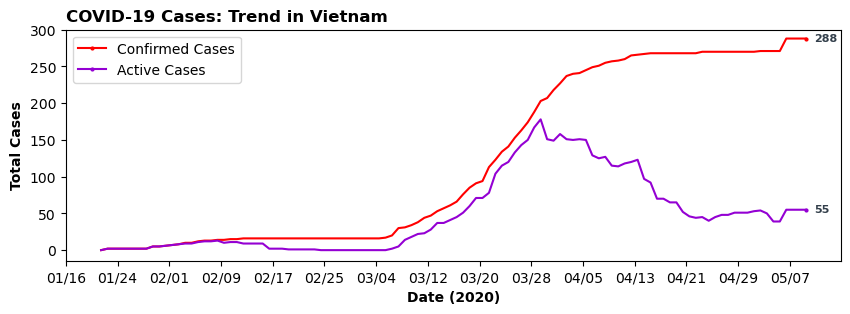

In [26]:
## GRAPH OF CASES

# reset style use
mpl.rcParams.update(mpl.rcParamsDefault)
# formate for date on graph
myFmt = DateFormatter('%m/%d')

fig, ax = plt.subplots(figsize  = (10,3))

#draw plot
ax.plot(df_cases.index, df_cases['Confirmed Cases'], '-o', markersize = 2, color = 'red', markevery=[-1])
ax.plot(df_cases.index, df_cases['No of Hospitalized Patients'],'-o',markersize = 2, color = 'darkviolet', markevery=[-1])

# decoration
ax.set_ylabel('Total Cases', fontdict = {'fontweight':'bold'})
ax.legend(['Confirmed Cases', 'Active Cases'])
ax.set_title('COVID-19 Cases: Trend in Vietnam', loc = 'left', fontdict = {'fontweight':'bold'})
ax.set_xlabel('Date (2020)', fontdict = {'fontweight':'bold'})

# axis
ax.xaxis.set_major_formatter(myFmt)
start, end = ax.get_xlim()
ax.set_xlim(left = start)
ax.set_ylim(top = 300)
x_value = np.arange(start, end, 8)
ax.xaxis.set_ticks(x_value)

# Annotation
end_date =  mdates.date2num(df_cases.index[-1])
case_value = []
case_value.append(df_cases['Confirmed Cases'].iloc[-1])
case_value.append(df_cases['No of Hospitalized Patients'].iloc[-1])

# Add annotation
for val in case_value:
    plt.annotate(int(val), # this is the text
                 (end_date,val), # this is the point to label
                 color = '#333F4B',fontsize = 8, weight = 'bold',
                 textcoords = "offset points", # how to position the text
                 xytext = (6,-2), # distance from text to points (x,y)
                 ha = 'left') # 
plt.savefig('Covid19Cases_Vietnam_trend.png', dpi = 200, bbox_inches='tight')    
plt.show()

## Geographical animation - Cases by Date in Vietnam

In [27]:
##### *********  MAP - STYLE 2  *********
# Using plotly.express (px)
# Using dataframe vietnam_cases_all_times

# Convert date to string for map
vietnam_cases_all_times['Date'] = pd.to_datetime(vietnam_cases_all_times['Date']).dt.strftime('%m/%d/%Y')

fig = px.scatter_geo(
    vietnam_cases_all_times, lat = 'Lat', lon = 'Long', 
    color = 'Confirmed Cases', size = 'Confirmed Cases', 
    scope = 'asia',
    animation_frame = 'Date', 
    range_color = [0, vietnam_cases_all_times['Confirmed Cases'].max()],  
    hover_name = 'Province/State',
    center = {'lat': 16, 'lon': 108}
)
#range_color = [0, vietnam_cases_all_times['Confirmed Cases'].max()], 
fig.update_layout(margin={"r": 0,"t": 0, "l": 0,"b": 0})
fig.layout.geo.projection = go.layout.geo.Projection(scale = 5)
fig.show()

In [28]:
##### *********  MAP - STYLE 2  *********
# Using folium

#drop the province/city that has 0 'Confirmed Cases' (if any)
most_recent_data = most_recent_data [most_recent_data['Confirmed Cases'] != 0]

#setting style for map
mapstyle = 'CartoDB positron'
line_color = '#da635eff'
fill_color = '#da635eff'
fill_opacity = 0.6
line_weight = 1.5
# other styles: 'OpenStreetMap', "Stamen Terrain”, “Stamen Toner”, “Stamen Watercolor”

vietnam_map = folium.Map(location = [16,108], zoom_start = 5, max_zoom = 12, min_zoom = 2, tiles = mapstyle)

for lat, long, case, name in zip(most_recent_data['Lat'], most_recent_data['Long'], most_recent_data['Confirmed Cases'],\
                                most_recent_data['Province/State']):
    folium.CircleMarker([lat, long], radius = (int((np.log(case + 1.00001))) + 0.8) * 5,
                       popup = ('<strong>Province/City</strong>: ' + str(name).capitalize() + '<br>'
                                '<strong>Confirmed Cases</strong>: ' + str(case) + '<br>'),\
                       color = line_color, weight= line_weight, \
                        fill_color = fill_color, fill_opacity = fill_opacity).add_to(vietnam_map)

#opacity = fill_opacity, 
 ### Add text
grid_pt=(51.4,0.05)
W=grid_pt[1]-0.005
E=grid_pt[1]+0.005
N=grid_pt[0]+0.005
S=grid_pt[0]-0.005


upper_left=(N,W)
upper_right=(N,E)
lower_right=(S,E)
lower_left=(S,W)
line_color='red'
fill_color='red'
weight=2
text='text'
edges = [upper_left, upper_right, lower_right, lower_left]
vietnam_map.add_child(folium.vector_layers.Polygon(locations=edges, color=line_color, fill_color=fill_color,
                                              weight=weight, popup=(folium.Popup(text))))

# Save map
vietnam_map.save("./vietnam_map.html")
vietnam_map

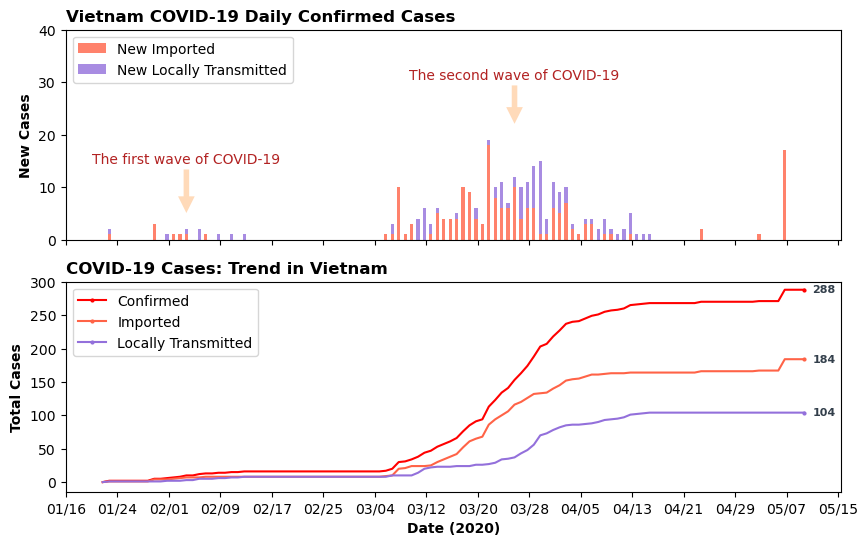

In [29]:
## GRAPH OF CASES
# reset style use
mpl.rcParams.update(mpl.rcParamsDefault)
# formate for date on graph

myFmt = DateFormatter('%m/%d')
# Layout: 2x1
fig, axs = plt.subplots(2,1, figsize  = (10,6), sharex = True)

## GRAPH OF NEW CASES - DAILY CASES
width = 0.5
axs[0].bar(df_cases.index, df_cases['New Imported Cases'], width, color = 'tomato',alpha=0.8 )
axs[0].bar(df_cases.index, df_cases['New Local Cases'], width, bottom = df_cases['New Imported Cases'], color = 'mediumpurple', alpha=0.8 )
axs[0].set_ylabel('New Cases', fontdict = {'fontweight':'bold'})
axs[0].legend(['New Imported', 'New Locally Transmitted'], loc = 'upper left')
axs[0].set_title('Vietnam COVID-19 Daily Confirmed Cases', loc = 'left', fontdict = {'fontweight':'bold'})
axs[0].set_ylim(top = 40)

#Annotation 
firstwave = dt.datetime(2020, 2, 4)
secondwave = dt.datetime(2020, 3, 26)
axs[0].annotate('The first wave of COVID-19',color = 'firebrick',
            xy = (mdates.date2num(firstwave), 5), 
            xytext = (mdates.date2num(firstwave), 14),
            ha = "center", va = "bottom",
            arrowprops = dict(facecolor='peachpuff', edgecolor = 'none', shrink = 0.01)
               )

axs[0].annotate('The second wave of COVID-19',color = 'firebrick',
            xy = (mdates.date2num(secondwave), 22), 
            xytext = (mdates.date2num(secondwave), 30),
            ha = "center", va = "bottom",
            arrowprops = dict(facecolor='peachpuff', edgecolor = 'none', shrink = 0.01)
            )

# CUMULLATIVE CASES - TOTAL CASES, IMPORTED AND LOCAL TRANSMITTED CASES
# plot
axs[1].plot(df_cases.index, df_cases['Confirmed Cases'], '-o', markersize = 2, color = 'red', markevery=[-1])
axs[1].plot(df_cases.index, df_cases['Imported Cases'], '-o', markersize = 2, color = 'tomato', markevery=[-1])
axs[1].plot(df_cases.index, df_cases['Local Cases'], '-o', markersize = 2, color = 'mediumpurple', markevery=[-1])
# decoration
axs[1].set_ylabel('Total Cases', fontdict = {'fontweight':'bold'})
axs[1].legend(['Confirmed', 'Imported','Locally Transmitted'])
axs[1].set_title('COVID-19 Cases: Trend in Vietnam', loc = 'left', fontdict = {'fontweight':'bold'})
axs[1].set_xlabel('Date (2020)', fontdict = {'fontweight':'bold'})
# set up axis
axs[1].xaxis.set_major_formatter(myFmt)
start, end = axs[1].get_xlim()
axs[1].set_xlim(left = start)
axs[1].set_ylim(top = 300)
x_value = np.arange(start, end, 8)
axs[1].xaxis.set_ticks(x_value)

# Annotation
end_date =  mdates.date2num(df_cases.index[-1])
case_value = []
case_value.append(df_cases['Confirmed Cases'].iloc[-1])
case_value.append(df_cases['Imported Cases'].iloc[-1])
case_value.append(df_cases['Local Cases'].iloc[-1])

# Add annotation
for val in case_value:
    plt.annotate(int(val), # this is the text
                 (end_date,val), # this is the point to label
                 color = '#333F4B',fontsize = 8, weight = 'bold',
                 textcoords = "offset points", # how to position the text
                 xytext = (6,-2), # distance from text to points (x,y)
                 ha = 'left') # 
plt.savefig('Covid19Cases_Vietnam_DailyCases.png', dpi = 200, bbox_inches='tight')  
plt.show()

# CONCLUSIONS
The COVID-19 pandemic in Vietnam can be described with 2 different waves: the first wave (Jan 23 to Feb 16, 2020) and the second waves (Mar 06 to late April, 2020). The number of imported cases has pretty much remained dominant in the daily new COVID-19 cases.

Interestingly, the increase in the number of COVID-19 imported and locally transmitted cases has the same trend, which added up to the total confirmed cases. In addition, the number of imported cases always larger than the locally transmitted cases.